<a href="https://colab.research.google.com/github/FarhahAdel/Data_Classification/blob/main/Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

**Main**


In [ ]:
col=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha',' fDist','class']
housing= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=col)
c={'g':1,'h':0} 
housing['class']=[c[item] for item in housing['class']]
minority=housing[housing['class']==0]
majority=housing[housing['class']==1]
downSample=resample(majority,replace=False, n_samples=6688,random_state=123)
sampled=pd.concat([downSample,minority])
y=sampled['class']
x=sampled.drop(['class'],axis=1)
print(Counter(y))
y

Counter({1: 6688, 0: 6688})


3766     1
8383     1
9796     1
746      1
3160     1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 13376, dtype: int64

**Data balancing and spliting**

In [ ]:
#rus=RandomUnderSampler(random_state=0,replacement=False)
#x_rus,y_rus=rus.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
x_train,y_train=shuffle(x_train,y_train)
x_test,y_test=shuffle(x_test,y_test)
print('original dataset: ',Counter(y))
print('train dataset: ',Counter(y_train))
print('test dataset: ',Counter(y_test))
print(x_train)
print(y_train)

original dataset:  Counter({1: 6688, 0: 6688})
train dataset:  Counter({1: 4682, 0: 4681})
test dataset:  Counter({0: 2007, 1: 2006})
        fLength   fWidth   fSize   fConc  ...   fM3Long  fM3Trans   fAlpha     fDist
15721   62.8309  46.1637  3.6151  0.1339  ...  -78.6550  -31.1439  48.5914  215.3740
16264  185.8045  52.0255  3.8666  0.1237  ... -220.0505   37.9070  53.6071  340.5532
9088    23.3073  17.4210  2.4440  0.4532  ...    4.4608   10.7805   2.7033  218.5440
17556   76.6007  33.8701  2.9424  0.1971  ...   81.1818   28.4643  32.2782  198.3273
15146  182.0710  17.2090  2.8890  0.2931  ...  115.5180   14.4658  45.6762  286.9550
...         ...      ...     ...     ...  ...       ...       ...      ...       ...
15913   18.7803   7.2908  2.3918  0.8073  ...   -9.8350    0.6426  40.3701  195.2130
17791  142.8704  42.1124  4.2558  0.0555  ... -154.8990   31.9466  31.1968  169.7139
14190   19.5279   9.3415  2.5587  0.6354  ...   13.8569   -3.9329  64.0780  217.6340
7421    20.0030 

**Functions**

In [ ]:
def AdaBoostCls(e):
  c = AdaBoostClassifier(n_estimators=e,learning_rate=1)
  Amodel = c.fit(x_train, y_train)
  y_pred = Amodel.predict(x_test)
  return y_pred

def KNN(k):
  neigh=KNeighborsClassifier(n_neighbors=k)
  Nmodel=neigh.fit(x_train,y_train)
  y_pred=Nmodel.predict(x_test)
  return y_pred

def randForest(e):
  rf_Model = RandomForestClassifier(n_estimators= e)
  model=rf_Model.fit(x_train,y_train)
  y_pred = rf_Model.predict(x_test)
  return y_pred

def calcs(y_pred):
  pre=precision_score(y_test, y_pred)
  r=recall_score(y_test, y_pred)
  ac=accuracy_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred)
  return ac,pre,r,f1
  
def printMat(mat):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(mat, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(mat.shape[0]):
     for j in range(mat.shape[1]):
         ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


**Adaboost Classification**



> Tuning



302


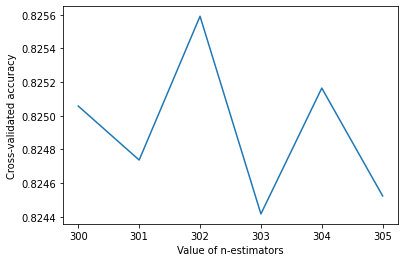

In [ ]:
n_range = list(range(300,306,1))
#n_scores = dict()
n_scores=[]
for n in n_range:    
    m = AdaBoostClassifier(n_estimators = n )  
    scores = cross_val_score(m, x_train, y_train, cv=10, scoring='accuracy')
    #n_scores[n] = scores.mean()
    n_scores.append(scores.mean())
plt.plot(n_range, n_scores)
plt.xlabel('Value of n-estimators')
plt.ylabel('Cross-validated accuracy')
print(n_range[np.argmax(n_scores)])



> Applying AdaBoost



accuracy=  0.8165960627959132
precision=  0.8200604838709677
recall=  0.8110667996011964
Fscore=  0.8155388471177945


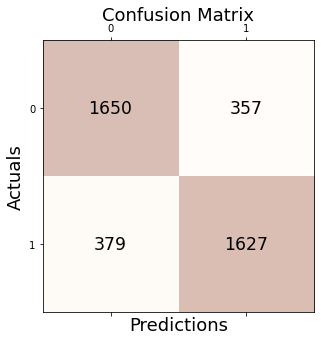

In [ ]:

y_pred1=AdaBoostCls(302)
acc,pre,recall,fScore=calcs(y_pred1)
mat=confusion_matrix(y_test,y_pred1)
print('accuracy= ',acc)
print('precision= ',pre)
print('recall= ',recall)
print('Fscore= ',fScore)
printMat(mat)

**KNN**



> Tuning



12


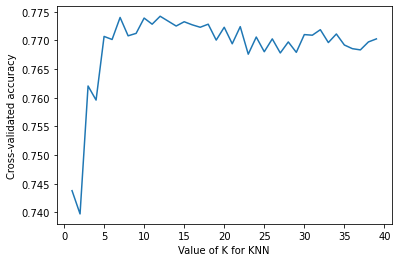

In [ ]:
n_range = list(range(1,40,1))
n_scores = []
for n in n_range:    
    rf_Model = KNeighborsClassifier(n_neighbors = n )  
    scores = cross_val_score(rf_Model, x_train, y_train, cv=10, scoring='accuracy')
    n_scores.append(scores.mean())
plt.plot(n_range, n_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
print(n_range[np.argmax(n_scores)])
#best_parameter1 = max(n_scores.items(), key = operator.itemgetter(1))[0]
#print(best_parameter1)



> Applying KNN



accuracy=  0.7704958883628208
precision=  0.7512737378415933
recall=  0.8085742771684945
Fscore=  0.7788715486194476


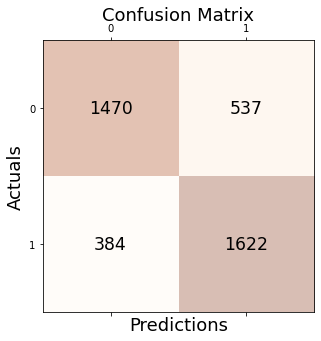

In [ ]:
#print('Optimal k value: ',best_parameter1)
y_pred2=KNN(12)
acc,pre,recall,fScore=calcs(y_pred2)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred2)
print('accuracy= ',acc)
print('precision= ',pre)
print('recall= ',recall)
print('Fscore= ',fScore)
printMat(conf_matrix)


**RandomForest**



> Tuning



341


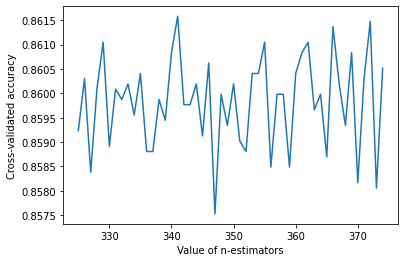

In [ ]:
n_range = list(range(325,375,1))
n_scores = []
for n in n_range:    
    rf_Model = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(rf_Model, x_train, y_train, cv=10, scoring='accuracy')
    n_scores.append(scores.mean())
#best_parameter2 = max(n_scores.items(), key = operator.itemgetter(1))[0]
#print(best_parameter2)
plt.plot(n_range, n_scores)
plt.xlabel('Value of n-estimators')
plt.ylabel('Cross-validated accuracy')
print(n_range[np.argmax(n_scores)])



> Applying RandomForest



Precision: 0.855
Recall: 0.855
Accuracy: 0.855
F1 Score: 0.855


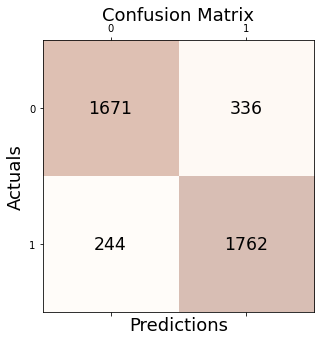

In [ ]:

y_pred3=randForest(341)
# Calculate the confusion matrix
conf_matrix =confusion_matrix(y_true=y_test, y_pred=y_pred3)
print('Precision: %.3f' % precision_score(y_test, y_pred3 ,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred3 ,average='micro',))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred3))
print('F1 Score: %.3f' % f1_score(y_test, y_pred3, average='micro'))
printMat(conf_matrix)



**Naive Bayes**

Accuracy=  0.6591078993271866
Precision=  0.6072629455279085
Recall=  0.9002991026919243
Fscore=  0.7253012048192772


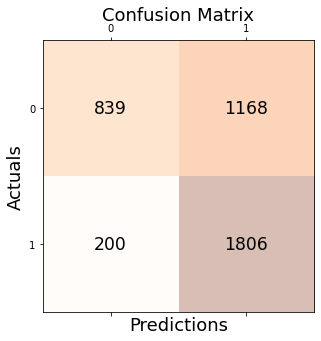

In [ ]:
# Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

ac,prec,recall,fScore=calcs(y_pred)
cm=metrics.confusion_matrix(y_test,y_pred)


#print("Original dataset:", Counter(y))
#print("Resample dataset:", Counter(y_rus))

#print("Test data: ",x_test)
# print("Predicted Value: ",y_pred)
# print("Actual Value: ",y_test)

# for item in zip(y_test,y_pred):
#     print("Actual: ",item[0],"Predicted: ",item[1])
  

#print("Confusion Matrix= ",cm)
print("Accuracy= ",ac)
print("Precision= ",prec)
print("Recall= ",recall)
print("Fscore= ",fScore)
printMat(cm)


**Decision Tree**

Enter the method of tree execution: gini or entropy:entropy
Entropy: 
|--- feature_8 <= 19.77
|   |--- feature_0 <= 114.52
|   |   |--- feature_8 <= 6.44
|   |   |   |--- feature_4 <= 0.24
|   |   |   |   |--- feature_1 <= 45.70
|   |   |   |   |   |--- feature_2 <= 3.51
|   |   |   |   |   |   |--- feature_1 <= 34.91
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  34.91
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  3.51
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  45.70
|   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |--- feature_8 <= 0.24
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  0.24
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |   |--- feature_6 <= -12.55
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  -12.55
|   |   |   |   |   |  

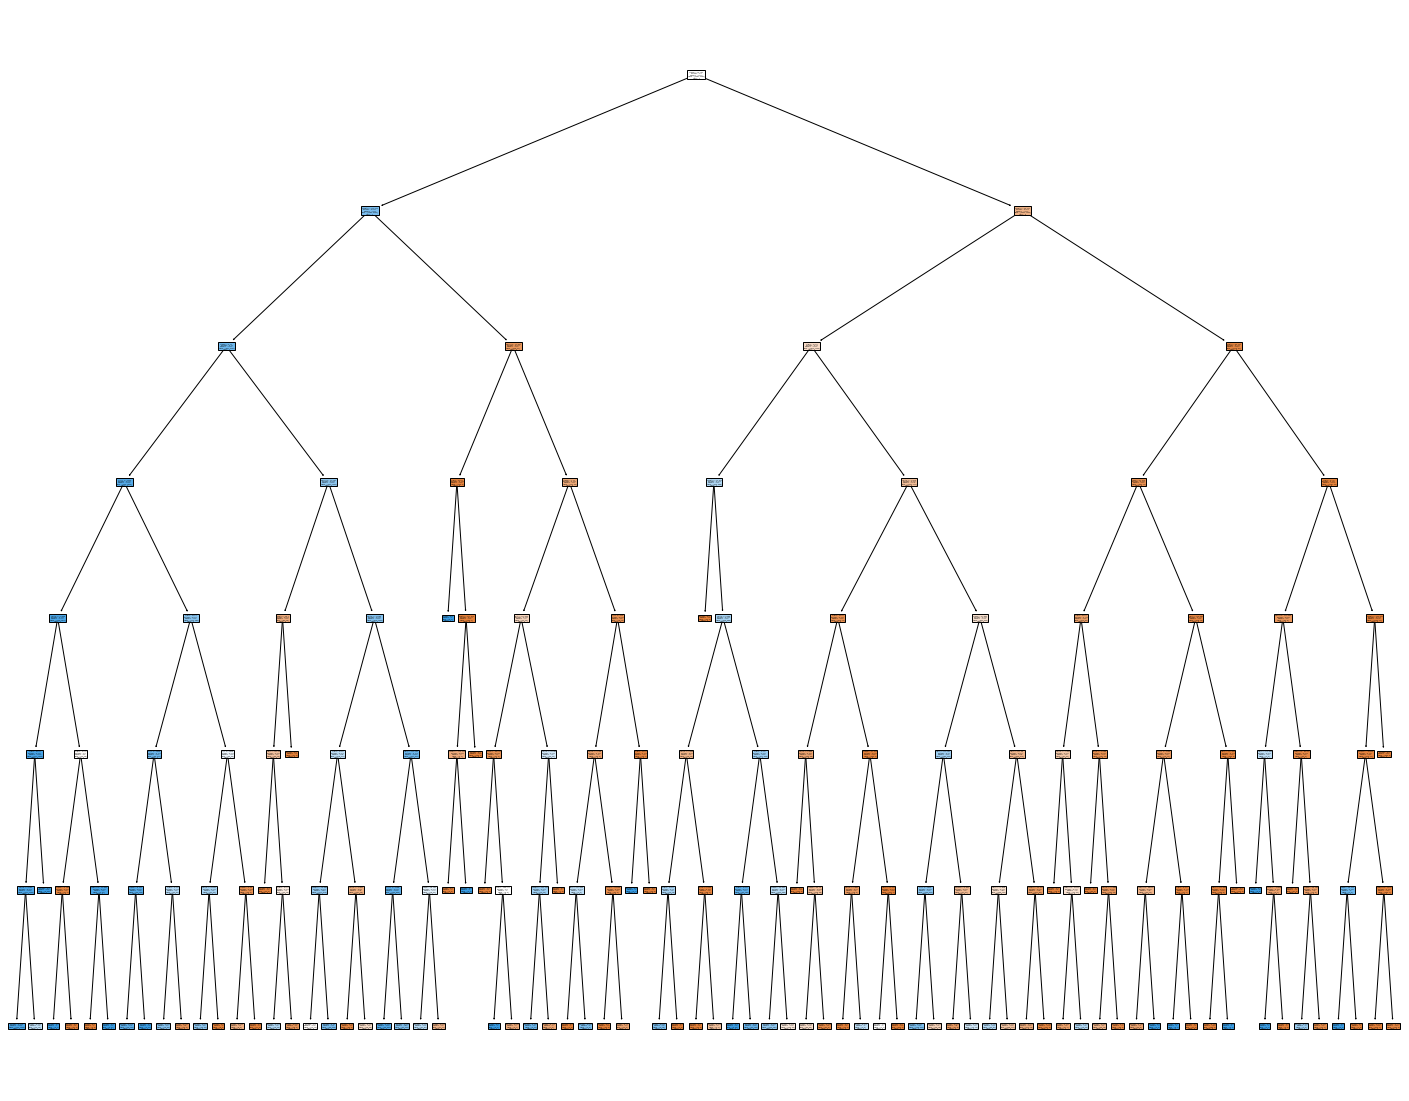

Accuracy=  0.7866932469474209
Precision=  0.7740705433746425
Recall=  0.8095712861415753
Fscore=  0.7914230019493177


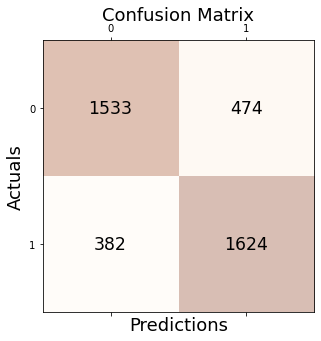

In [ ]:
param = input('Enter the method of tree execution: gini or entropy:')
if (param =='gini'):
  print("Gini: ")
  clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
if (param == 'entropy'):
  print("Entropy: ")
  clf = DecisionTreeClassifier(criterion='entropy',max_depth=7)
  # clf = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=7, min_samples_leaf=5)

treeModel = clf.fit(x_train, y_train)

text_representation = tree.export_text(treeModel)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeModel,
                 feature_names=col,
                 class_names=["0","1"],
                 filled=True)
plt.show()
fig.savefig("decistion_tree.png")

y_pred = treeModel.predict(x_test)

acc,prec,recall,fScore=calcs(y_pred)
mat = metrics.confusion_matrix(y_test,y_pred)

print('Accuracy= ',acc)
print('Precision= ',prec)
print('Recall= ',recall)
print('Fscore= ',fScore)
printMat(mat)
